# JOB CHANGE OF DATA SCIENTISTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline and column transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Data splitter and model evaluator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# Learning models (use one of them or any other model)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Ensemble learning models
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor

# Pipeline and column transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Performance metrics
from sklearn.metrics import log_loss, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

In [2]:
import os
os.getcwd()

'C:\\Users\\Maui\\Desktop'

In [3]:
df_train = pd.read_csv('aug_train.csv')

In [4]:
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
df_test = pd.read_csv('aug_test.csv')

In [6]:
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [7]:
#lets print full summary of dataframe
df_train.info()
# we see dataframe has 19,157 rows, 14 columns, data type in each column, and number of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [8]:
# we have separate training and test data sets. lets combine train and test together to do common feature engineering
train_replica = df_train.copy()
test_replica = df_test.copy()

In [9]:
# set up a flag field to distinguish records from training and testing sets in the combined dataset
train_replica['tst'] = 0
test_replica['tst'] = 1

In [10]:
# combine training and testing data into a single dataframe to do uniform part of feature engineering
combined_data = pd.concat([train_replica, test_replica], axis=0, sort=True)
del train_replica
del test_replica

In [11]:
combined_data

,city,city_development_index,company_size,company_type,education_level,enrolled_university,enrollee_id,experience,gender,last_new_job,major_discipline,relevent_experience,target,training_hours,tst
0,city_103,0.920,NaN,NaN,Graduate,no_enrollment,8949,>20,Male,1,STEM,Has relevent experience,1.0,36,0
1,city_40,0.776,50-99,Pvt Ltd,Graduate,no_enrollment,29725,15,Male,>4,STEM,No relevent experience,0.0,47,0
2,city_21,0.624,NaN,NaN,Graduate,Full time course,11561,5,NaN,never,STEM,No relevent experience,0.0,83,0
3,city_115,0.789,NaN,Pvt Ltd,Graduate,NaN,33241,<1,NaN,never,Business Degree,No relevent experience,1.0,52,0
4,city_162,0.767,50-99,Funded Startup,Masters,no_enrollment,666,>20,Male,4,STEM,Has relevent experience,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,city_103,0.920,NaN,Public Sector,Graduate,no_enrollment,1289,16,Male,4,Humanities,No relevent experience,NaN,15,1
2125,city_136,0.897,NaN,NaN,Masters,no_enrollment,195,18,Male,2,STEM,Has relevent experience,NaN,30,1
2126,city_100,0.887,NaN,Pvt Ltd,Primary School,no_enrollment,31762,3,Male,never,NaN,No relevent experience,NaN,18,1
2127,city_102,0.804,100-500,Public Sector,High School,Full time course,7873,7,Male,1,NaN,Has relevent experience,NaN,84,1


In [12]:
from numpy import nan
from numpy import isnan
values=combined_data.values
imputer= SimpleImputer(missing_values=nan, strategy='most_frequent')
transformed_values=imputer.fit_transform(values)

# Feature Categorization

In [13]:
#Nominal: gender, enrolled_university, major_discipline, company_type,   
#Ordinal: company_size, education_level, last_new_job, relevent_experience
#Numerical: experience, training_hours

# Lets begin by handling NaN missing values in ALL columns

In [14]:
mode_values=combined_data [['gender', 'enrolled_university', 'major_discipline', 'company_type']].mode()
print(mode_values)

  gender enrolled_university major_discipline company_type
0   Male       no_enrollment             STEM      Pvt Ltd


In [15]:
#Lets fill all NaN values in ALL COLUMNS(imputing)
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='most_frequent') 
combined_data.gender=imputer.fit_transform(combined_data['gender']. values.reshape(-1,1))[:,0]
combined_data.relevent_experience=imputer.fit_transform(combined_data['relevent_experience']. values.reshape(-1,1))[:,0]
combined_data.education_level=imputer.fit_transform(combined_data['education_level']. values.reshape(-1,1))[:,0]
combined_data.major_discipline=imputer.fit_transform(combined_data['major_discipline']. values.reshape(-1,1))[:,0]
combined_data.experience=imputer.fit_transform(combined_data['experience']. values.reshape(-1,1))[:,0]
combined_data.company_size=imputer.fit_transform(combined_data['company_size']. values.reshape(-1,1))[:,0]
combined_data.company_type=imputer.fit_transform(combined_data['company_type']. values.reshape(-1,1))[:,0]
combined_data.last_new_job=imputer.fit_transform(combined_data['last_new_job']. values.reshape(-1,1))[:,0]
combined_data.training_hours=imputer.fit_transform(combined_data['training_hours']. values.reshape(-1,1))[:,0]
combined_data.enrolled_university=imputer.fit_transform(combined_data['enrolled_university']. values.reshape(-1,1))[:,0]
combined_data.target=imputer.fit_transform(combined_data['target']. values.reshape(-1,1))[:,0]

In [16]:
combined_data.isnull().sum()

city                      0
city_development_index    0
company_size              0
company_type              0
education_level           0
enrolled_university       0
enrollee_id               0
experience                0
gender                    0
last_new_job              0
major_discipline          0
relevent_experience       0
target                    0
training_hours            0
tst                       0
dtype: int64

# Checking list of all values in columns so we can code them 

In [17]:
combined_data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
combined_data.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [19]:
combined_data.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [20]:
combined_data.major_discipline.unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [21]:
combined_data.company_type.unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [22]:
combined_data.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

# One Hot Encoding of Nominal Variables (company_type, enrolled_university, gender, major_discipline)

In [23]:
# we need to use label encoder before we use on-hot encoding. Label endocer will convert string values to numerical values.
# we need to encode every categorical feature separately, meaning we need as many encoders as categorical features. 
#Let’s loop over all categorical features and build a dictionary that will map a feature to its encoder:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# For each categorical column
# We fit a label encoder, transform our column and add it to our new dataframe

nom_columns = ["gender", "enrolled_university", "company_type", "major_discipline"]
label_encoders = {}
for col in nom_columns:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    combined_data[col] = new_le.fit_transform(combined_data[col])
    label_encoders[col] = new_le

Encoding gender
Encoding enrolled_university
Encoding company_type
Encoding major_discipline


In [24]:
# Now that we have label encoded nominal features; we can do one hot encoding. 
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit_transform( combined_data[['gender','enrolled_university','company_type','major_discipline']] ).toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [25]:
combined_data.drop(['city', 'city_development_index', 'enrollee_id'], axis=1, inplace=True)

# Mapping Ordinal Features 
# (company_size, education_level, last_new_job, relevent_experience)

In [26]:
# Ordinal features are company_size, education_level, last_new_job, relevent_experience
# Lets find unique values in each of these columns so we can map them.
# Oridnal featues are mapped; one-hot-encoding is not done on oridnal features

In [27]:
combined_data.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [28]:
combined_data.education_level.unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [29]:
combined_data.company_size.unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [30]:
combined_data.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [31]:
#Mapping ordinal features. Creating new columns for ordinal features. 
relevent_experience_map= {'Has relevent experience': 1, 'No relevent experience':2}
combined_data['relevent_experience_ordinal'] = combined_data.relevent_experience.map(relevent_experience_map)

education_level_map = {'Primary School': 1, 'High School':2, 'Masters':3, 'Graduate':4, 'Phd':5}
combined_data['education_level_ordinal'] = combined_data.education_level.map(education_level_map)

company_size_map = {'<10': 1, '10/49':1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
combined_data['company_size_ordinal'] = combined_data.company_size.map(company_size_map)

last_new_job_map = {'never': 0, '1':1, '2':2, '3':3, '4':4, '>4':5}
combined_data['last_new_job_ordinal'] = combined_data.last_new_job.map(last_new_job_map)



# Cleaning columns with continuous data

In [32]:
#In column experience managing the < and > signs
combined_data['experience'] = combined_data['experience'].replace(['>20', '<1'], ['20', '1'])
combined_data

,company_size,company_type,education_level,enrolled_university,experience,gender,last_new_job,major_discipline,relevent_experience,target,training_hours,tst,relevent_experience_ordinal,education_level_ordinal,company_size_ordinal,last_new_job_ordinal
0,50-99,5,Graduate,2,20,1,1,5,Has relevent experience,1.0,36,0,1,4,2,1
1,50-99,5,Graduate,2,15,1,>4,5,No relevent experience,0.0,47,0,2,4,2,5
2,50-99,5,Graduate,0,5,1,never,5,No relevent experience,0.0,83,0,2,4,2,0
3,50-99,5,Graduate,2,1,1,never,1,No relevent experience,1.0,52,0,2,4,2,0
4,50-99,1,Masters,2,20,1,4,5,Has relevent experience,0.0,8,0,1,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,50-99,4,Graduate,2,16,1,4,2,No relevent experience,0.0,15,1,2,4,2,4
2125,50-99,5,Masters,2,18,1,2,5,Has relevent experience,0.0,30,1,1,3,2,2
2126,50-99,5,Primary School,2,3,1,never,5,No relevent experience,0.0,18,1,2,1,2,0
2127,100-500,4,High School,0,7,1,1,5,Has relevent experience,0.0,84,1,1,2,3,1


# Defining predictor and traget variables. Splitting data into test and training

In [33]:
# Define Predictors and Target Variable
nom_col = ['gender','enrolled_university', 'major_discipline', 'company_type'] 
ord_col = ['company_size_ordinal', 'education_level_ordinal', 'last_new_job_ordinal', 'relevent_experience_ordinal']
num_col = ['experience', 'training_hours']   

X= combined_data[nom_col + ord_col + num_col]
y= combined_data['target']

# Splitting Data into Training Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,   #remove for Logisticregression
                                                    random_state=4
                                                   )

# Checking for balanced or imbalanced data (since its a classification prob)

In [34]:
print(combined_data['target'].value_counts())

0.0    16510
1.0     4777
Name: target, dtype: int64


Our dataset is imbalanced. For imbalanced dataset performance metrics will be Confusion Matrix, 
Precicion, Recall, and F1 Score. We use Accuracy only when dataset is balanced (50/50 or 60/40 difference)

In [35]:
#Recall = TP/(TP+FN)      
# Out of total actual positive values how many positive did we predict correctly (TPR or Sensitivity)
# When you want to reduce FN (eg cancer or not) use Recall.

# Precision = TP/ (TP+FP)  
# Out of total actual predicted positive rsults how many results were actual positive (Positive Prediction Value)  
# When your FP is important (you want to reduce it, eg spam or not) value use Precision

# If FP and FN are noth important then use weighted average of FP and Fn which is called F1 SCORE.

# Standardizing data

In [36]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Making pipeline branches. Creating the main pipe.

In [37]:
# In the following block we experiment with different models. 
# The one with closely matching training accuracy and test accuracy will be used for hyperparameter tuning.
# If training accuracy is much higher than validation/test accuracy that means model suffers from HIGH VARIANCE. 
# HIGH VARAINCE= OVERFITTING = model fits training data perfectly but does not do a good job with out of model data
# If test accuracy is signifcantly higher than training accuracy mlodel suffers from HIGH BIAS.
# HIGH BIAS= UNDERFITTING = decision boundary is very simple thus fails to capture important relations.

In [38]:
# Branch for nominal features
nom_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore')
                        )
# Branch for ordinal features
ord_pipe = make_pipeline(SimpleImputer(strategy='median'),
                         StandardScaler()
                        )
# Branch for numerical features
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                         MinMaxScaler()
                        )
# Make the main pipe, in which a column transformer sends columns into relevent pipes
pipe = make_pipeline(ColumnTransformer( [ ('nom', nom_pipe, nom_col),
                                          ('ord', ord_pipe, ord_col),
                                          ('num', num_pipe, num_col) ] ),
                     #PCA(n_components=3),
                     #LDA(n_components=8),
                     #SVC(kernel='rbf', C=100, gamma=1)
                     #LogisticRegression(solver='lbfgs', C=0.01)
                     DecisionTreeClassifier(criterion='gini', max_depth=6)
                     #RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1)
                     #KNeighborsClassifier(n_neighbors=10, p=2)
                    )
pipe.fit(X_train,y_train)

print('Training score:', pipe.score(X_train,y_train))
print("Test accuracy: ", pipe.score(X_test, y_test))

Training score: 0.7775838926174496
Test accuracy:  0.7721935180836074


# Plotting Confusion Matrix & Getting Classification Report

In [39]:
# Each row (x-axis) in a confusion matrix represents an actual class, 
# while each column (y-axis) represents a predicted class. 

Classification Report:

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      4954
         1.0       0.28      0.29      0.29      1433

    accuracy                           0.68      6387
   macro avg       0.54      0.54      0.54      6387
weighted avg       0.68      0.68      0.68      6387



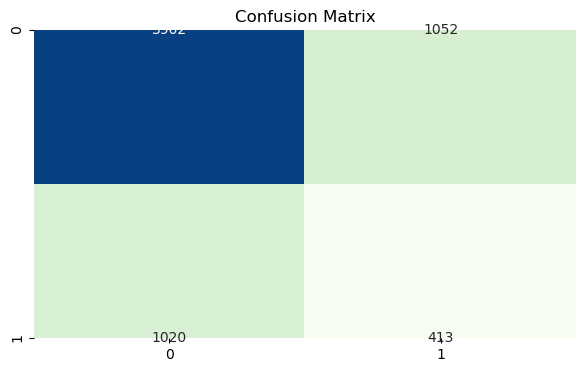

In [40]:
def get_perfomance_details(y_pred,y_test):
    #Classification report
    print ("Classification Report:\n")
    print (classification_report(y_true=y_test,y_pred=y_pred))
    
    #Draw confusion matrix
    sns.reset_defaults()
    plt.figure(figsize=(7,4));
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="GnBu",fmt="g",cbar=False);
    plt.title("Confusion Matrix");
    plt.show()    
    
from sklearn.metrics import classification_report
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_perfomance_details(y_pred,y_test)

In [41]:
# Precision — What percent of your predictions were correct? 
# From classification report we have 79% of class 0  as correct & 28% of class 1 as correct


# Recall — What percent of the positive cases did you catch?
# 78% of class 0 positive cases and 30% of class 1 positive cases

#My Notes
# class0 is not looking for a job change and class1 is those who are looking for a job change. 
# If the problem's focus is to find those not looking for a job change then we have decent positve cases captured.
# However, if the problem's fopcus is to find a higher percent of those who are looking to chnage jobs then we have captured
# a very little correct predictions/ positive cases. In that case we will need to switch the model.

# Support is the number of actual occurrences of the class in the dataset.


# Evaluating Model Performance: ROC AUC....


----------------
AOC ROC details
----------------

AUC score: 0.5373392153082975
True positive rate: [0.         0.28820656 1.        ]
False postive rate: [0.         0.21235365 1.        ]


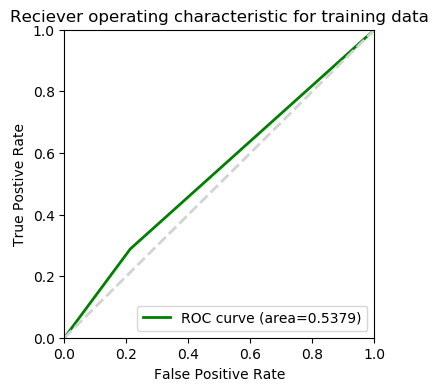

In [42]:
 #Find the Area under the curve
print ("\n----------------\nAOC ROC details\n----------------\n")
rocauc_score=roc_auc_score(y_pred,y_test)
    
#ROC curve
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_aoc=auc(fpr,tpr)
print (f"AUC score: {rocauc_score}\nTrue positive rate: {tpr}\nFalse postive rate: {fpr}")


#Draw the ROC curve
plt.figure(figsize=(4,4));
lw=2
plt.plot(fpr,tpr,
            color='green',
            lw=lw,
            label='ROC curve (area=%0.4f)' % roc_aoc);
    
#plot diagonal line  from (0,0) to (1,1), represents fpt=tpr
plt.plot([0,1],[0,1],color='lightgrey',lw=lw,linestyle='--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.xlabel("False Positive Rate");
plt.ylabel("True Postive Rate");
plt.title("Reciever operating characteristic for training data");
plt.legend(loc='lower right')
plt.show()


In [43]:
# AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. 
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# AUC tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. 

# In our case AUC is not very high. We can try to train a different model.


# Performance Metrics for the Model

In [44]:
print('\nMeasuring performance using log loss (the lower the better):')
print('Training set log loss:', log_loss(y_train, pipe.predict_proba(X_train)))
print('Test set     log loss:', log_loss(y_test,  pipe.predict_proba(X_test)))


Measuring performance using log loss (the lower the better):
Training set log loss: 0.48452846365234475
Test set     log loss: 0.5487815835846126


# Hyperparameter Tuning & Plotting Validation Curve

In [45]:
# A learning curve plots the score over varying numbers of training samples, while a validation curve plots the score over 
# a varying hyper parameter. The learning curve is a tool for finding out if an estimator would benefit from more data, 
#or if the model is too simple (biased). If the training curve and validation curves converge that means this classifier 
# would hardly benefit from adding more training data; a more expressive model may be more appropriate.

# The validation curve is a tool for finding good hyper parameter settings. 
# Some hyper parameters (number of neurons in a neural network, maximum tree depth in a decision tree, 
# amount of regularization, etc.) control the complexity of a model. 
# We want the model to be complex enough to capture relevant information in the training data but not too complex to avoid 
# overfitting.

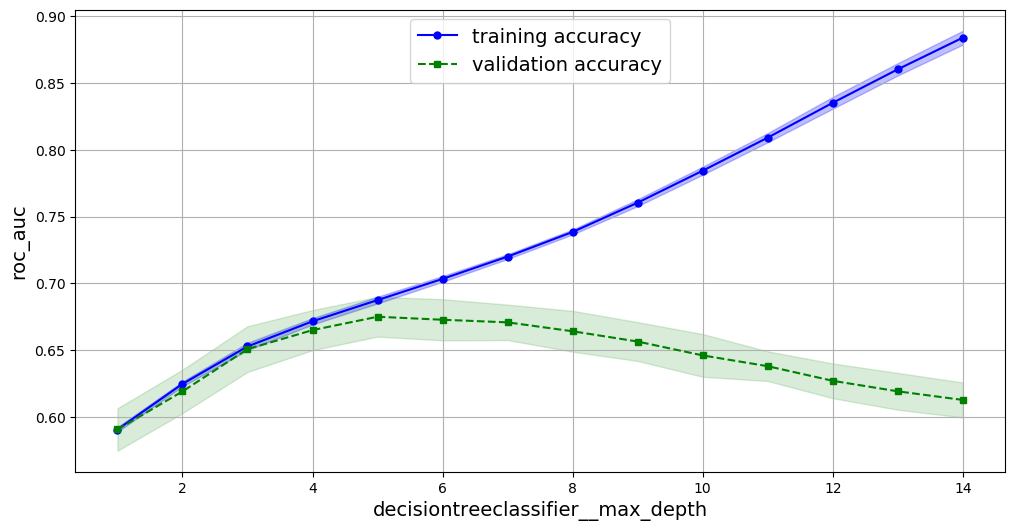

In [46]:
#param_name  = 'svc__gamma'
#param_range = np.logspace(-5, 1, 13)
#param_name  = 'logisticregression__C'
#param_range = np.logspace(-4, 2, 13)
param_name  = 'decisiontreeclassifier__max_depth'
param_range = np.arange(1,15)
#param_name  = 'randomforestclassifier__max_depth'
#param_range = np.arange(1,40)
#param_name  = 'kneighborsclassifier__n_neighbors'
#param_range = np.arange(1,26,2)

#scoring='r2'           # for regression problems
#scoring='accuracy'     # for classification problems with balanced target varaiable values
#scoring='neg_log_loss' # for classification problems
scoring='roc_auc'      # for classification problems


train_scores, val_scores = validation_curve(estimator=pipe, X=X_train, y=y_train, 
                                            cv=10,
                                            param_name=param_name, 
                                            param_range=param_range,
                                            scoring = scoring
                                            )

trn_mean = np.mean(train_scores, axis=1)
trn_std  = np.std (train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std  = np.std (val_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(param_range, trn_mean, 'bo-',  markersize=5, label='training accuracy')
plt.fill_between(param_range, trn_mean+trn_std, trn_mean-trn_std, alpha=0.25, color='blue')

plt.plot(param_range, val_mean, 'gs--', markersize=5, label='validation accuracy')
plt.fill_between(param_range, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')  # Use this only when param_range = np.logspace(...). Comment this out otherwise.
plt.legend(loc='upper center', fontsize=14)
plt.xlabel(param_name, fontsize=14)
plt.ylabel(scoring, fontsize=14)
#plt.savefig('val_curve')
plt.show()

# Tuning Multiple Hyperparameters Together by GRIDSEARCH

In [47]:
params = {'decisiontreeclassifier__max_depth': np.arange(1, 15, 3),
          'decisiontreeclassifier__min_samples_leaf': [5, 10],
          #'logisticregression__C':  np.logspace(-4, 2, 5),
          #'svc__C': np.logspace(-5, 1, 5)
          # you can add more parameters here
         }

gs = GridSearchCV(estimator=pipe, 
                  cv=10,
                  param_grid=params,
                  scoring=scoring
                 )
gs.fit(X_train, y_train)

print('Best parameters:', gs.best_params_, 
      '\nValidation %s: %.6f +/- %.6f' % (scoring, gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_]),
      '\n      Test %s: %.6f\n' % (scoring, gs.best_estimator_.score(X_test,y_test)))

pipe = gs.best_estimator_    # This is the FINAL model (already retrained by GridSearchCV)


print('Best Model:')

print('Training score:', pipe.score(X_train,y_train))
print('    Test score:', pipe.score(X_test,y_test))

print('\nMeasuring performance using log loss (the lower the better):')
print('Training set log loss:', log_loss(y_train, pipe.predict_proba(X_train)))
print('    Test set log loss:', log_loss(y_test,  pipe.predict_proba(X_test)))

print('\nMeasuring performance using roc_auc  (the higher the better: highest possible is 1, random guess is 0.5):')
print('Training set roc auc:', roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print('    Test set roc auc:', roc_auc_score(y_test,  pipe.predict_proba(X_test) [:,1]))

Best parameters: {'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_samples_leaf': 10} 
Validation roc_auc: 0.670714 +/- 0.013237 
      Test roc_auc: 0.768749

Best Model:
Training score: 0.7783221476510067
    Test score: 0.7687490214498199

Measuring performance using log loss (the lower the better):
Training set log loss: 0.47761721542974256
    Test set log loss: 0.5880958673895741

Measuring performance using roc_auc  (the higher the better: highest possible is 1, random guess is 0.5):
Training set roc auc: 0.7156918732330686
    Test set roc auc: 0.6685602448316557


# Model Diagnosis: Learning Curve
# (if model can benefit from collecting more samples)

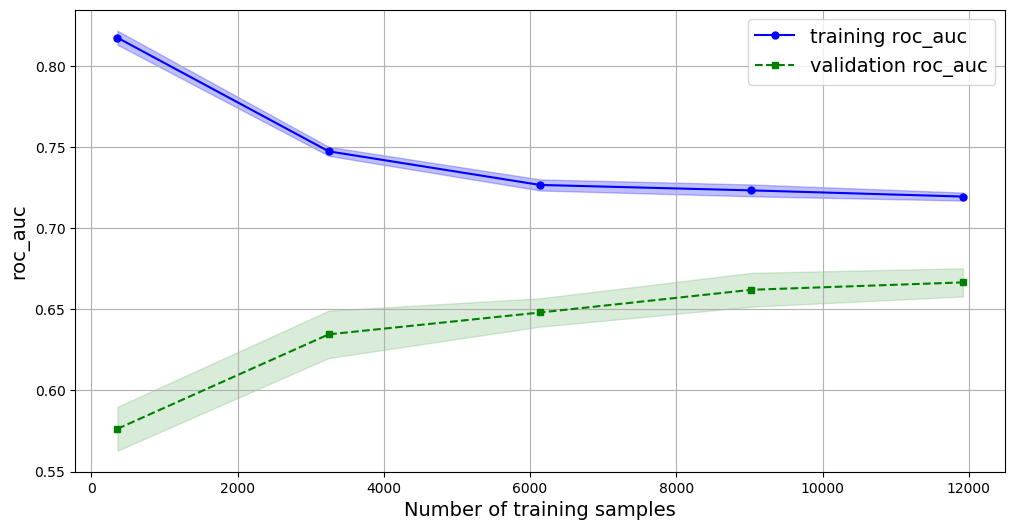

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.03, 1.0, 5),
                                                        cv=5,
                                                        scoring=scoring
                                                       )
train_mean= np.mean(train_scores, axis=1)
train_std = np.std (train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std (test_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, 'bo-', markersize=5, label='training '+ scoring)
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.25, color='blue')

plt.plot(train_sizes, test_mean, 'gs--', markersize=5, label='validation '+ scoring)
plt.fill_between(train_sizes, test_mean + test_std,  test_mean - test_std,   alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples', fontsize=14)
plt.ylabel(scoring, fontsize=14)
plt.legend(loc='best', fontsize=14)
# plt.savefig('learning_curve', dpi=300)
plt.show()

In [ ]:
# We can see the curve converge. Hence model will not benefit by collecting more data. 